### Counting Electrons to determine the electron dose

Data acquired from an empty area in order to obtain the dose per pixel in the enamel 4DSTEM experiment

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage
import scipy.ndimage

In [3]:
#Reading single diffraction 
from ncempy.io import dm
im0 = dm.dmReader('(1) Diffraction of vacuum_256x256_50_25.dm3')
diff = im0['data']

# Normalizing here:
diff_norm = diff/255;

In [4]:
print('After normalization: data type: {}, Min: {}, max: {}'.format(diff_norm.dtype, diff_norm.min(), diff_norm.max()))

After normalization: data type: float64, Min: 0.0, max: 1.0


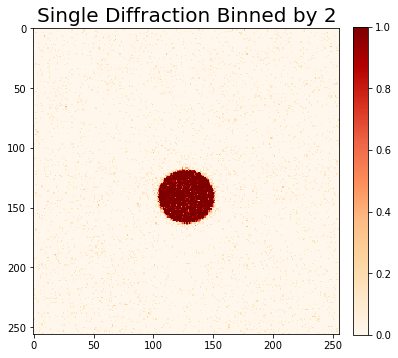

In [5]:
fig, axis = plt.subplots(figsize=(6,6))
im_handle = axis.imshow(diff_norm, cmap=plt.cm.OrRd)
# Add a colorbar
cbar = plt.colorbar(im_handle, ax=axis, fraction=0.046, pad=0.04)
axis.set_title('Single Diffraction Binned by 2',fontsize=20);

C:\ProgramData\Anaconda3\envs\py4Dstem\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


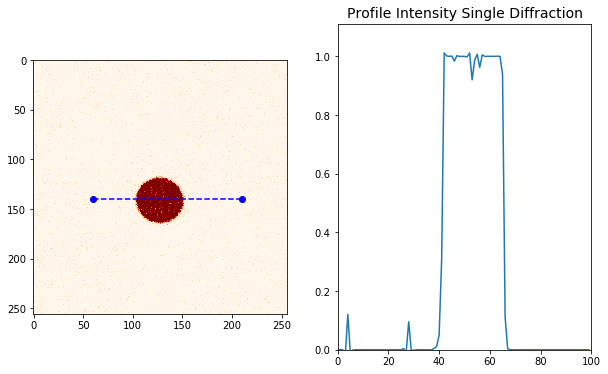

In [10]:
#-- Extract the line...
# Make a line with "num" points...

x0, y0 = 60, 140 # These are in _pixel_ coordinates!!
x1, y1 = 210, 140
num = 100
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)


# Extract the values along the line, using cubic interpolation
zi = scipy.ndimage.map_coordinates(diff_norm, np.vstack((x,y)))

#-- Plot...
fig, axes = plt.subplots(ncols=2, figsize=(10,6))
axes[0].imshow(diff_norm, cmap = plt.cm.OrRd)
axes[0].plot([x0, x1], [y0, y1], 'bo--')
axes[0].axis('image')

axes[1].plot(zi)
axes[1].set(xlim=(0, 100), ylim=(0, max(zi)+0.1))
axes[1].set_title('Profile Intensity Single Diffraction', fontsize=14)

plt.savefig("Profile_Intensity.png", dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
plt.show()



In [15]:
binnned = 4 # Original acquisition size was 1024x1024 pixels

dose = (diff_norm > 0.2).sum()
npixels = diff_norm.shape[0]*diff_norm.shape[1]
dose_pix = dose/npixels

exposure = 0.00349467 # in seconds
dose_rate= dose_pix/exposure #accounting for binnning

print(f'Total dose per frame = {dose} electrons')
print(f'Total dose per pixel in a frame = {dose_pix} e-/px')
print(f'Dose rate in = {dose_rate} e-/px/sec')

Total dose per frame = 1949 electrons
Total dose per pixel in a frame = 0.0297393798828125 e-/px
Dose rate in = 8.509925080998348 e-/px/sec
